In [2]:
# Quantlibのインポート（初回のみ）
# Quantlibをmoduleフォルダにインポートする
!pip install --target /content/drive/MyDrive/デリバティブ取引のすべて第二版/Derivatives/modules QuantLib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 10.7 MB/s eta 0:00:00


In [3]:
# colab立ち上げ時実行
# module読み込み
import sys
sys.path.append('/content/drive/MyDrive/デリバティブ取引のすべて第二版/Derivatives/modules')

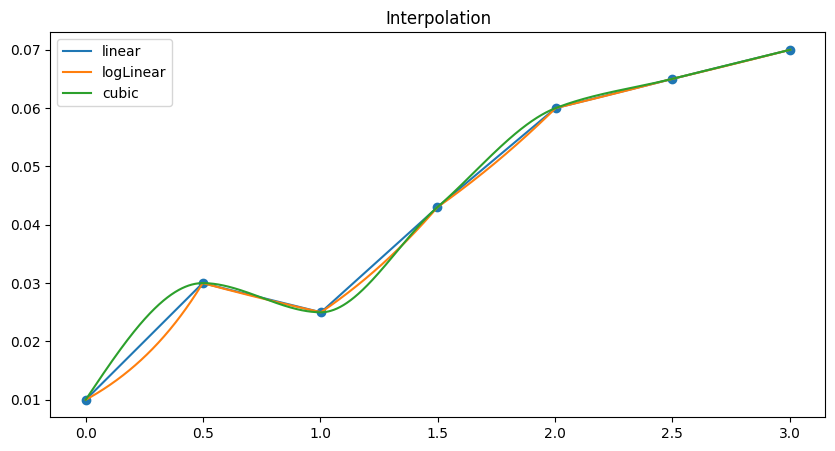

In [5]:
import pandas as pd
import QuantLib as ql
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta

spot_dates =  [ql.Date(18, 1, 2020), ql.Date(18, 7, 2020), ql.Date(18, 1, 2021), ql.Date(18, 7, 2021), ql.Date(18, 1, 2022), ql.Date(18, 7, 2022), ql.Date(18, 1, 2023)]

spot_rates = [0.01, 0.03, 0.025, 0.043, 0.06, 0.065, 0.07]

plt.figure(figsize=(10,5))

#期間
strdt = dt.strptime("2020-01-18", '%Y-%m-%d')  # 開始日
qlStrdt = ql.Date(strdt.strftime("%Y-%m-%d"), '%Y-%m-%d')
enddt = dt.strptime("2023-01-18", '%Y-%m-%d')  # 終了日
days_num = days_num = (enddt - strdt).days + 1
datelist = [strdt + timedelta(days=x) for x in range(days_num)]
qlDates = []
for dt in datelist:
    d = dt.strftime("%Y-%m-%d")
    d = ql.Date(d, '%Y-%m-%d')
    qlDates.append(d)

spot_times = [ql.Actual365Fixed().yearFraction(qlStrdt, date) for date in spot_dates]
plt.scatter(spot_times, spot_rates)

zero_curve = ql.ZeroCurve(spot_dates, spot_rates, ql.Actual365Fixed())
zero_curve.enableExtrapolation() #node外を補外

rate_linear = [zero_curve.zeroRate(date, zero_curve.dayCounter(), ql.Continuous).rate() for date in qlDates]
time = [ql.Actual365Fixed().yearFraction(qlStrdt, date) for date in qlDates]
plt.plot(time, rate_linear, label=f"linear")

logLinearZeroCurve = ql.LogLinearZeroCurve(spot_dates, spot_rates, ql.Actual365Fixed())
logLinearZeroCurve.enableExtrapolation() #node外を補外

rate_logLinear = [logLinearZeroCurve.zeroRate(date, zero_curve.dayCounter(), ql.Continuous).rate() for date in qlDates]
plt.plot(time, rate_logLinear, label=f"logLinear")

cubicZeroCurve = ql.CubicZeroCurve(spot_dates, spot_rates, ql.Actual365Fixed())
cubicZeroCurve.enableExtrapolation() #node外を補外

rate_cubic = [cubicZeroCurve.zeroRate(date, zero_curve.dayCounter(), ql.Continuous).rate() for date in qlDates]
plt.plot(time, rate_cubic, label=f"cubic")

plt.title("Interpolation")
plt.legend();

plt.savefig('Interpolation.png')